In [1]:
import sys
import numpy as np
import cv2
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Conv2D, Flatten, Dense, MaxPool2D,MaxPooling2D, Activation, Dropout, BatchNormalization, Input
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import itertools

In [2]:
path = "C:\\DataScience\\ADC\\clothdata1\\"
train_data_path = path+"train"
test_data_path = path+"test"
valid_data_path = path+"valid"

In [3]:
############################################
# Set image size and batch size

img_rows = 224
img_cols = 224
batch_size = 10

In [4]:
############################################
# Set Data Generator for training, testing and validataion.
# Note for testing, set shuffle = false (For proper Confusion matrix)

train_datagen = ImageDataGenerator(zoom_range=0.2, 
                                   width_shift_range=0.2,
                                   horizontal_flip=True,
                                   rotation_range=10,
                                   fill_mode="constant",
                                   cval=0)
train_generator = train_datagen.flow_from_directory(train_data_path,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical', shuffle=True)

valid_datagen = ImageDataGenerator()
valid_generator = valid_datagen.flow_from_directory(valid_data_path,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical', shuffle=True)

test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(test_data_path,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical', shuffle=False)


Found 643 images belonging to 12 classes.
Found 273 images belonging to 12 classes.
Found 273 images belonging to 12 classes.


In [5]:
#########################################################################
# Function for plots images with labels within jupyter notebook


def plots(ims, figsize=(12,12), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1


    for i in range(len(ims)):
        sp = f.add_subplot(cols, rows, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=12)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


{'Addidas': 0, "Birki's": 1, 'Brother': 2, 'Hilleberg': 3, 'Husky': 4, 'K-Swiss': 5, 'Pillsbury': 6, 'Salewa': 7, 'Springfield': 8, 'Unicef': 9, 'Vans': 10, 'White Castle': 11}


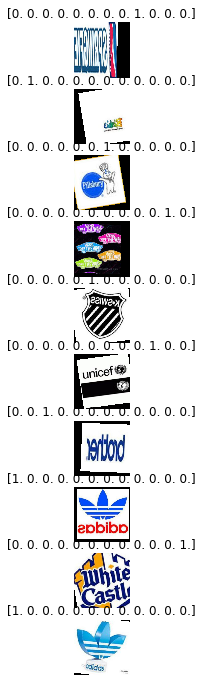

In [6]:
#########################################################################
#Check the training set (with batch of 10 as defined above

imgs, labels = next(train_generator)
num_classes = 12
#Images are shown in the output
plots(imgs, titles=labels)

#Images Classes with index
print(train_generator.class_indices)


#Model Creation / Sequential
model = Sequential([Conv2D(16, (3, 3), padding ='same',activation='relu', 
                           input_shape=(img_rows, img_cols, 3)),
                    MaxPooling2D(),
                    Conv2D(32, (3, 3), padding ='same',activation='relu',
                           input_shape=(img_rows, img_cols, 3)),
                    MaxPooling2D(),    
                    Conv2D(64, (3, 3), padding ='same',activation='relu', 
                           input_shape=(img_rows, img_cols, 3)),
                    MaxPooling2D(),  
                    Conv2D(128, (3, 3), padding ='same',activation='relu', 
                           input_shape=(img_rows, img_cols, 3)),
                    MaxPooling2D(),  
                    Flatten(), 
                    Dense(12, activation='softmax')
                   ])



In [7]:
#Get summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       7

In [8]:
#Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
#Train the model
history = model.fit_generator(train_generator, steps_per_epoch=20, validation_data=valid_generator, 
                              validation_steps=4, epochs=100)


C:\Users\Admin\Anaconda3\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
20/20 [==============================] - 17s 285ms/step - loss: 67.2097 - accuracy: 0.1041 - val_loss: 2.1641 - val_accuracy: 0.3000
Epoch 2/100
20/20 [==============================] - 5s 261ms/step - loss: 2.3225 - accuracy: 0.2148 - val_loss: 2.1236 - val_accuracy: 0.3000
Epoch 3/100
20/20 [==============================] - 6s 277ms/step - loss: 2.2026 - accuracy: 0.2635 - val_loss: 1.6442 - val_accuracy: 0.5250
Epoch 4/100
20/20 [==============================] - 6s 290ms/step - loss: 1.7409 - accuracy: 0.4374 - val_loss: 2.2440 - val_accuracy: 0.3000
Epoch 5/100
20/20 [==============================] - 5s 265ms/step - loss: 1.9078 - accuracy: 0.3422 - val_loss: 1.9862 - val_accuracy: 0.5000
Epoch 6/100
20/20 [==============================] - 5s 254ms/step - loss: 1.7070 - accuracy: 0.4474 - val_loss: 1.7167 - val_accuracy: 0.4500
Epoch 7/100
20/20 [==============================] - 6s 273ms/step - loss: 1.9423 - accuracy: 0.3759 - val_loss: 1.9941 - val_accuracy: 0.45

Epoch 58/100
20/20 [==============================] - 6s 313ms/step - loss: 0.7792 - accuracy: 0.7400 - val_loss: 1.9603 - val_accuracy: 0.5500
Epoch 59/100
20/20 [==============================] - 6s 316ms/step - loss: 0.6813 - accuracy: 0.7394 - val_loss: 1.3333 - val_accuracy: 0.6500
Epoch 60/100
20/20 [==============================] - 6s 306ms/step - loss: 0.5773 - accuracy: 0.8159 - val_loss: 1.5314 - val_accuracy: 0.5250
Epoch 61/100
20/20 [==============================] - 6s 308ms/step - loss: 0.7664 - accuracy: 0.7729 - val_loss: 1.2828 - val_accuracy: 0.7000
Epoch 62/100
20/20 [==============================] - 6s 298ms/step - loss: 0.7495 - accuracy: 0.7793 - val_loss: 1.4260 - val_accuracy: 0.7000
Epoch 63/100
20/20 [==============================] - 6s 294ms/step - loss: 0.8259 - accuracy: 0.7156 - val_loss: 1.3478 - val_accuracy: 0.6250
Epoch 64/100
20/20 [==============================] - 6s 315ms/step - loss: 0.6640 - accuracy: 0.7941 - val_loss: 2.1427 - val_accuracy:

In [10]:
#Get the accuracy score

test_score = model.evaluate_generator(test_generator, batch_size)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])

C:\Users\Admin\Anaconda3\lib\site-packages\keras\engine\training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[INFO] accuracy: 81.00%
[INFO] Loss:  1.6149382591247559


Text(0.5, 1.0, 'Accuracy Curves')

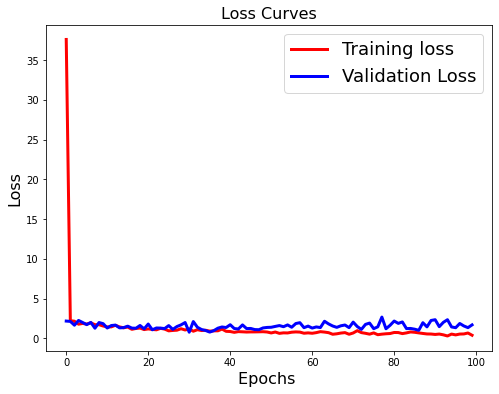

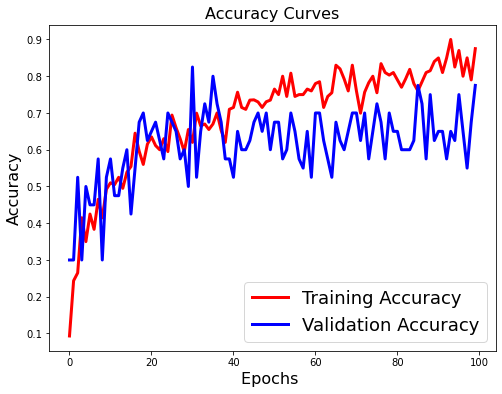

In [11]:
#Plot the Graph

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)



# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


In [12]:
##################################################################################################
#Plot the confusion matrix. Set Normalize = True/False


def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [13]:

#Print the Target names

target_names = []
for key in train_generator.class_indices:
    target_names.append(key)

print(target_names)


['Addidas', "Birki's", 'Brother', 'Hilleberg', 'Husky', 'K-Swiss', 'Pillsbury', 'Salewa', 'Springfield', 'Unicef', 'Vans', 'White Castle']


C:\Users\Admin\Anaconda3\lib\site-packages\keras\engine\training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
Normalized confusion matrix


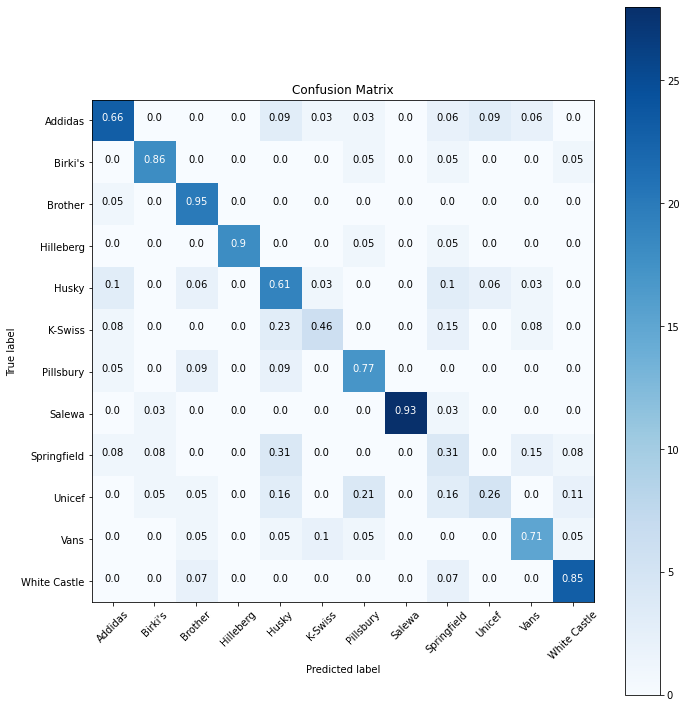

In [14]:
#Confution Matrix 

Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')


In [15]:
#Print Classification Report

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

     Addidas       0.77      0.66      0.71        35
     Birki's       0.86      0.86      0.86        21
     Brother       0.71      0.95      0.82        21
   Hilleberg       1.00      0.90      0.95        20
       Husky       0.54      0.61      0.58        31
     K-Swiss       0.60      0.46      0.52        13
   Pillsbury       0.68      0.77      0.72        22
      Salewa       1.00      0.93      0.97        30
 Springfield       0.21      0.31      0.25        13
      Unicef       0.50      0.26      0.34        19
        Vans       0.71      0.71      0.71        21
White Castle       0.82      0.85      0.84        27

    accuracy                           0.72       273
   macro avg       0.70      0.69      0.69       273
weighted avg       0.73      0.72      0.72       273



In [16]:
#Save the model
model.save("goodbase_confusion.hdf5")

In [17]:
#Test the model

from keras.models import load_model
img_rows = 224
img_cols = 224

model = load_model("goodbase_confusion.hdf5")